#Table of Contents
* [Set up](#Set-up)
* [Plot data from 20150330 - Irgacure 1% and UV-326 1%](#Plot-data-from-20150330---Irgacure-1%-and-UV-326-1%)
* [Plot data for commercial resin](#Plot-data-for-commercial-resin)
* [Compare fits](#Compare-fits)
* [Need more data for commercial resin](#Need-more-data-for-commercial-resin)


# Set up

In [75]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy.optimize import curve_fit
import os

[This notebook](http://nbviewer.ipython.org/gist/keflavich/4042018) has a good tutorial on curve fitting. Note the use of np.polyfit(), np.polyval(), and curve_fit() from scipy.optimize.

In [2]:
#help(np.polyfit)

In [3]:
#help(np.polyval)

In [4]:
#help(curve_fit)

In [5]:
datadirectory = 'membrane_thickness_data'
def makename(filename):
    return os.path.join(datadirectory,filename)

# Plot data from 20150330 - Irgacure 1% and UV-326 1%

In [6]:
filename1 = 'Exp150330_Irgacure_1.0_UV326_1.0_.csv'
data1 = np.loadtxt(makename(filename1), delimiter=',', skiprows=1)
print(data1)

[[   0.3    54.5     9.49]
 [   0.35  105.7    15.94]
 [   0.4   127.62   13.19]
 [   0.45  185.95   15.6 ]
 [   0.5   197.56   16.36]]


<Container object of 3 artists>

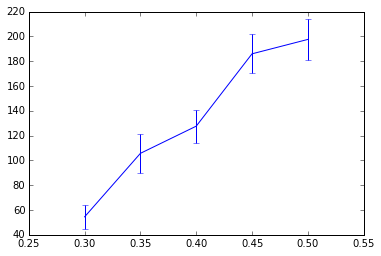

In [7]:
fig, ax = plt.subplots()
ax.errorbar(data1[:,0],data1[:,1],data1[:,2])

In [8]:
def membthickfunc(t,a,b):
    return a*np.log(t/b)

In [9]:
fitpars, covmat = curve_fit(membthickfunc, data1[:,0], data1[:,1])#, p0=[0.01,0.24])
std_devs = np.sqrt(covmat.diagonal())

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


In [10]:
print('fit params:', fitpars)
print('    stdevs:', std_devs)

fit params: [  2.88233065e+02   2.47048025e-01]
    stdevs: [  2.71746517e+01   1.16362149e-02]


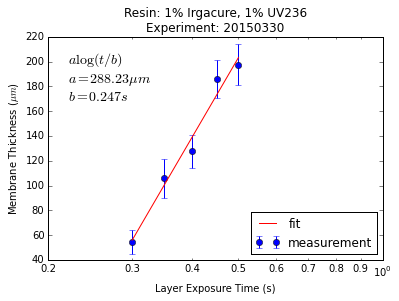

In [62]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data1[:,0], data1[:,1], data1[:,2], linestyle='None', marker='o', label='measurement')
ax.plot(data1[:,0], membthickfunc(data1[:,0],*fitpars), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.2,1.0)
ax.legend(loc=4)
fittext = '$a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(fitpars[0],fitpars[1])
ax.text(0.22,170,fittext,fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 1% UV236\nExperiment: 20150330')
fig.savefig(makename('G_150330_'));

# Plot data for commercial resin

[[   1.    133.5    15.05]
 [   1.5   195.5    12.34]
 [   2.    294.66   66.92]
 [   3.    358.25   15.6 ]]


(0.9, 3.1)

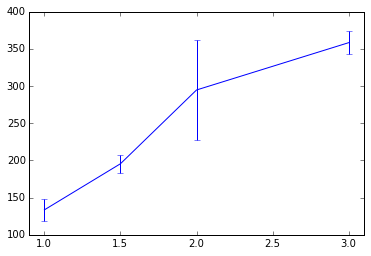

In [50]:
filename2 = 'Exp150410_commercialresin_.csv'
data2 = np.loadtxt(makename(filename2), delimiter=',', skiprows=1)
print(data2)
fig, ax = plt.subplots()
ax.errorbar(data2[:,0],data2[:,1],data2[:,2])
ax.set_xlim(0.9,3.1)

In [53]:
fitpars2, covmat2 = curve_fit(membthickfunc, data2[:,0], data2[:,1])
std_devs2 = np.sqrt(covmat2.diagonal())
print('fit params:', fitpars2)
print('    stdevs:', std_devs2)

fit params: [ 213.56714283    0.54875133]
    stdevs: [ 24.28841407   0.07598341]


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


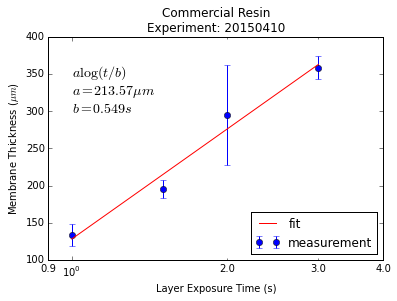

In [60]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data2[:,0], data2[:,1], data2[:,2], linestyle='None', marker='o', label='measurement')
ax.plot(data2[:,0], membthickfunc(data2[:,0],*fitpars2), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.9,4.0)
ax.legend(loc=4)
fittext = '$a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(fitpars2[0],fitpars2[1])
ax.text(1.0,300,fittext,fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Commercial Resin\nExperiment: 20150410')
fig.savefig(makename('G_commercialresin'));

# Compare fits 

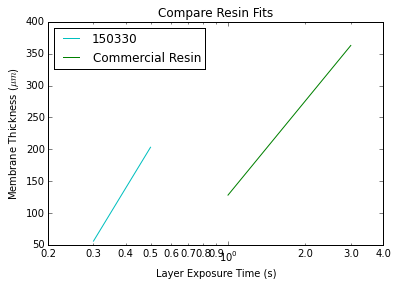

In [71]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(data1[:,0], membthickfunc(data1[:,0],*fitpars), 'c-', label='150330')
ax.plot(data2[:,0], membthickfunc(data2[:,0],*fitpars2), 'g-', label='Commercial Resin')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.2,4.0)
ax.legend(loc=2)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Compare Resin Fits')


# Need more data for commercial resin

In [74]:
print(membthickfunc(0.7,*fitpars2))

51.9897075156


Looks like we need a layer exposure time of 0.7 seconds to get ~50 um layer thickness. We should try this.